In [1]:
# !pip3 install pandas;
# !pip3 install matplotlib;
# !pip3 install numpy;

import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;

topology = 'custom';

udp_colnames=['HOST', 'PROTOCOL', 'CONNECTION_ID', 'INTERVAL_START', 'INTERVAL_END', 'TRANSFER', 'TRANSFER_UNIT', 'BANDWIDTH', 'BANDWIDTH_UNIT', 'JITTER', 'JITTER_UNIT', 'LOSS_PERCENT', 'LATENCY_AVG', 'LATENCY_MIN', 'LATENCY_MAX', 'LATENCY_STDEV', 'LATENCY_UNIT', 'PPS']; 
udp_sdn_df = pd.read_csv('./network/' + topology + '/results/SDN/database_UDP.csv', names=udp_colnames, header=0);
udp_sdn_df = udp_sdn_df[udp_sdn_df['INTERVAL_END'] - udp_sdn_df['INTERVAL_START'] == 1];
udp_sdn_df = udp_sdn_df[udp_sdn_df['INTERVAL_START'].gt(10)]
udp_sdn_df = udp_sdn_df[udp_sdn_df['INTERVAL_END'].lt(190)]

udp_trad_df = pd.read_csv('./network/' + topology + '/results/TRADITIONAL/database_UDP.csv', names=udp_colnames, header=0);
udp_trad_df = udp_trad_df[udp_trad_df['INTERVAL_END'] - udp_trad_df['INTERVAL_START'] == 1]
udp_trad_df = udp_trad_df[udp_trad_df['INTERVAL_START'].gt(10)]
udp_trad_df = udp_trad_df[udp_trad_df['INTERVAL_END'].lt(190)]


tcp_colnames=['HOST', 'PROTOCOL', 'CONNECTION_ID', 'INTERVAL_START', 'INTERVAL_END', 'TRANSFER', 'TRANSFER_UNIT', 'BANDWIDTH', 'BANDWIDTH_UNIT']; 
tcp_sdn_df = pd.read_csv('./network/' + topology + '/results/SDN/database_TCP.csv', names=tcp_colnames, header=0);
tcp_sdn_df = tcp_sdn_df[tcp_sdn_df['INTERVAL_END'] - tcp_sdn_df['INTERVAL_START'] == 1];
tcp_sdn_df = tcp_sdn_df[tcp_sdn_df['INTERVAL_START'].gt(10)]
tcp_sdn_df = tcp_sdn_df[tcp_sdn_df['INTERVAL_END'].lt(190)]

tcp_trad_df = pd.read_csv('./network/' + topology + '/results/TRADITIONAL/database_TCP.csv', names=tcp_colnames, header=0);
tcp_trad_df = tcp_trad_df[tcp_trad_df['INTERVAL_END'] - tcp_trad_df['INTERVAL_START'] == 1]
tcp_trad_df = tcp_trad_df[tcp_trad_df['INTERVAL_START'].gt(10)]
tcp_trad_df = tcp_trad_df[tcp_trad_df['INTERVAL_END'].lt(190)]

plt.style.use('dark_background');

### TCP Analisys

- Bandwidth
- Transfer

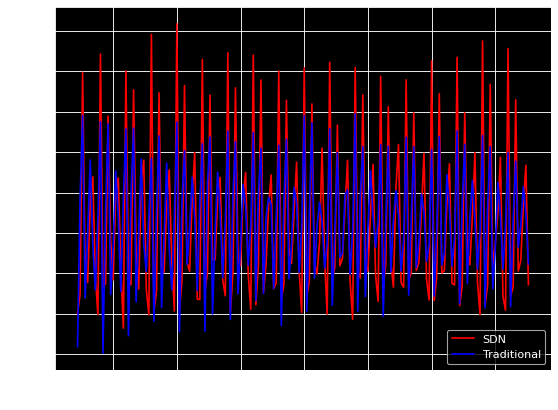

In [2]:
# BANDWIDTH

tcp_sdn_df_copy = tcp_sdn_df.copy();
tcp_trad_df_copy = tcp_trad_df.copy();

# sdn_avg = tcp_sdn_df_copy['BANDWIDTH'].mean();
# trad_avg = tcp_trad_df_copy['BANDWIDTH'].mean();

# print(sdn_avg, trad_avg)

sdn_grouped = tcp_sdn_df_copy.groupby(by='INTERVAL_START', as_index=False)
trad_grouped = tcp_trad_df_copy.groupby(by='INTERVAL_START', as_index=False);

sdn_grouped_bd = sdn_grouped.agg({'BANDWIDTH': np.mean});
trad_grouped_bd = trad_grouped.agg({'BANDWIDTH': np.mean});
plt.figure(figsize=(8, 6), dpi=80)
plt.xlabel('Time (secs)');
plt.ylabel('Bandwidth (Mbits/s)');
plt.plot(sdn_grouped_bd['INTERVAL_START'], sdn_grouped_bd['BANDWIDTH'], color='r', label='SDN');
plt.plot(trad_grouped_bd['INTERVAL_START'], trad_grouped_bd['BANDWIDTH'], color='b', label='Traditional');
# plt.plot(trad_grouped_bd['INTERVAL_START'], [trad_avg] * 178, color='y', label='Traditional Avg', linestyle='dashed');
# plt.plot(trad_grouped_bd['INTERVAL_START'], [sdn_avg] * 178, color='g', label='SDN Avg', linestyle='dashed');
plt.legend();
plt.grid();
plt.show();



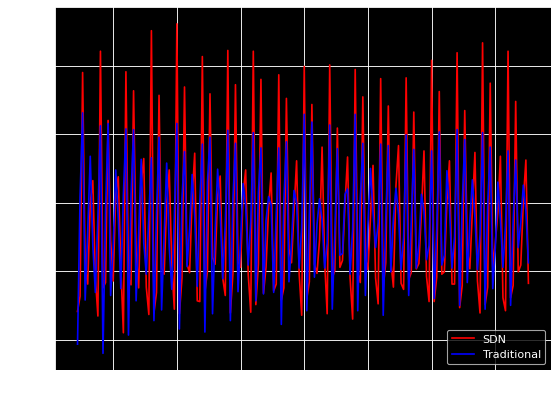

In [3]:
# TRANSFER

sdn_grouped_transfer = sdn_grouped.agg({'TRANSFER': np.mean});
trad_grouped_transfer = trad_grouped.agg({'TRANSFER': np.mean});

plt.figure(figsize=(8, 6), dpi=80)
plt.xlabel('Time (secs)');
plt.ylabel('Transfer (Mbits)');
plt.plot(sdn_grouped_transfer['INTERVAL_START'], sdn_grouped_transfer['TRANSFER'], color='r', label='SDN');
plt.plot(trad_grouped_transfer['INTERVAL_START'], trad_grouped_transfer['TRANSFER'], color='b', label='Traditional');
plt.legend();
plt.grid();
plt.show();


### UDP Analisys

- Latency (Average)
- Transfer

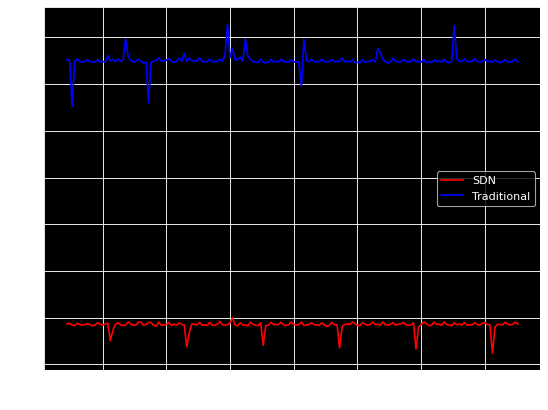

In [4]:
# LATENCY
udp_sdn_df_copy = udp_sdn_df.copy();
udp_trad_df_copy = udp_trad_df.copy();
udp_sdn_df_copy['LATENCY_AVG'] = udp_sdn_df_copy['LATENCY_AVG'].astype(float);
# udp_trad_df_copy[udp_trad_df_copy['LATENCY_AVG'] == 'ms']
udp_trad_df_copy['LATENCY_AVG'] = udp_trad_df_copy['LATENCY_AVG'].astype(float);


sdn_grouped = udp_sdn_df_copy.groupby(by='INTERVAL_START', as_index=False)
trad_grouped = udp_trad_df_copy.groupby(by='INTERVAL_START', as_index=False);

sdn_grouped_latency = sdn_grouped.agg({'LATENCY_AVG': np.mean});
trad_grouped_latency = trad_grouped.agg({'LATENCY_AVG': np.mean});

plt.figure(figsize=(8, 6), dpi=80)
plt.xlabel('Time (secs)');
plt.ylabel('Latency (ms)');
plt.plot(sdn_grouped_latency['INTERVAL_START'], sdn_grouped_latency['LATENCY_AVG'], color='r', label='SDN');
plt.plot(trad_grouped_latency['INTERVAL_START'], trad_grouped_latency['LATENCY_AVG'], color='b', label='Traditional');
plt.legend();
plt.grid();
plt.show();

<function matplotlib.pyplot.show(close=None, block=None)>

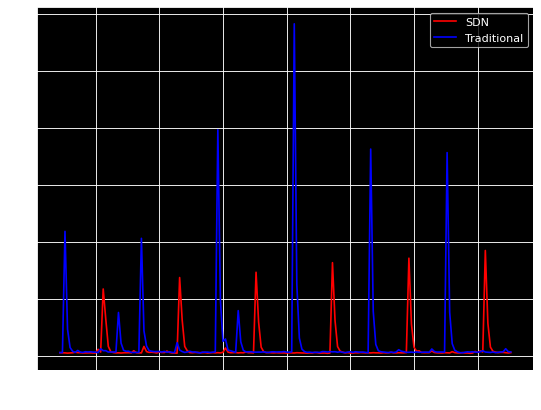

In [5]:
# JITTER

sdn_grouped_jitter = sdn_grouped.agg({'JITTER': np.mean});
trad_grouped_jitter = trad_grouped.agg({'JITTER': np.mean});

plt.figure(figsize=(8, 6), dpi=80)
plt.xlabel('Time (secs)');
plt.ylabel('Jitter (ms)');
plt.plot(sdn_grouped_jitter['INTERVAL_START'], sdn_grouped_jitter['JITTER'], color='r', label='SDN');
plt.plot(trad_grouped_jitter['INTERVAL_START'], trad_grouped_jitter['JITTER'], color='b', label='Traditional');
plt.legend();
plt.grid();
plt.show

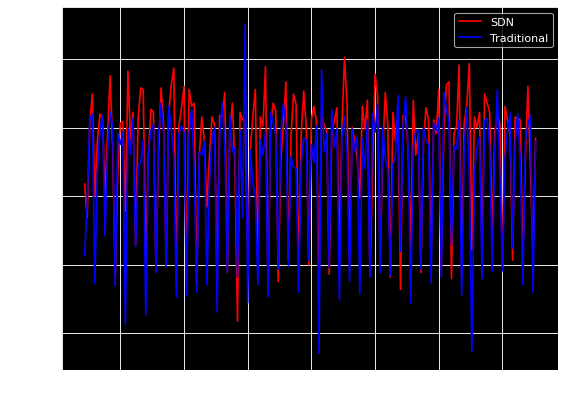

In [6]:
# BANDWIDTH

sdn_grouped_bd = sdn_grouped.agg({'BANDWIDTH': np.mean});
trad_grouped_bd = trad_grouped.agg({'BANDWIDTH': np.mean});

plt.figure(figsize=(8, 6), dpi=80)
plt.xlabel('Time (secs)');
plt.ylabel('Bandwidth (Mbits/s)');
plt.plot(sdn_grouped_bd['INTERVAL_START'], sdn_grouped_bd['BANDWIDTH'], color='r', label='SDN');
plt.plot(trad_grouped_bd['INTERVAL_START'], trad_grouped_bd['BANDWIDTH'], color='b', label='Traditional');
plt.legend();
plt.grid();
plt.show();

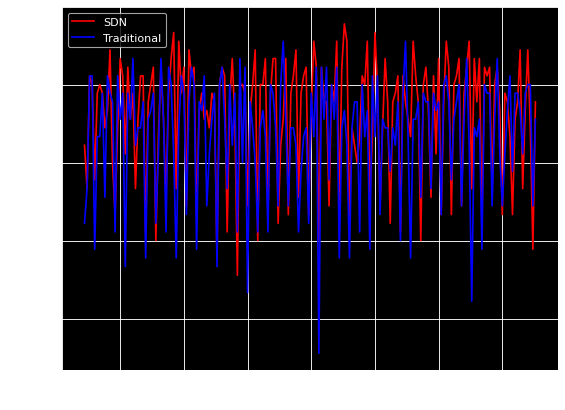

In [7]:
# TRANSFER

sdn_grouped_transfer = sdn_grouped.agg({'TRANSFER': np.mean});
trad_grouped_transfer = trad_grouped.agg({'TRANSFER': np.mean});

plt.figure(figsize=(8, 6), dpi=80)
plt.xlabel('Time (secs)');
plt.ylabel('Transfer (MBytes)');
plt.plot(sdn_grouped_transfer['INTERVAL_START'], sdn_grouped_transfer['TRANSFER'], color='r', label='SDN');
plt.plot(trad_grouped_transfer['INTERVAL_START'], trad_grouped_transfer['TRANSFER'], color='b', label='Traditional');
plt.legend();
plt.grid();
plt.show();


3.9506491885143573 4.34059925093633


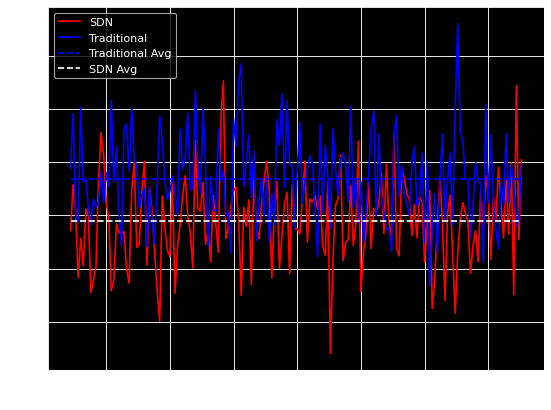

In [8]:
# LOSS
udp_sdn_df_copy = udp_sdn_df.copy();
udp_trad_df_copy = udp_trad_df.copy();

sdn_avg = udp_sdn_df_copy['LOSS_PERCENT'].mean();
trad_avg = udp_trad_df_copy['LOSS_PERCENT'].mean();

sdn_grouped_loss = sdn_grouped.agg({'LOSS_PERCENT': np.mean});
trad_grouped_loss = trad_grouped.agg({'LOSS_PERCENT': np.mean});


print(sdn_avg, trad_avg)

plt.figure(figsize=(8, 6), dpi=80)
plt.xlabel('Time (secs)');
plt.ylabel('Loss Rate (%)');
plt.plot(sdn_grouped_loss['INTERVAL_START'], sdn_grouped_loss['LOSS_PERCENT'], color='r', label='SDN');
plt.plot(trad_grouped_loss['INTERVAL_START'], trad_grouped_loss['LOSS_PERCENT'], color='b', label='Traditional');
plt.plot(trad_grouped_bd['INTERVAL_START'], [trad_avg] * 178, color='b', label='Traditional Avg', linestyle='dashed');
plt.plot(trad_grouped_bd['INTERVAL_START'], [sdn_avg] * 178, color='w', label='SDN Avg', linestyle='dashed');
plt.legend();
plt.grid();
plt.show();